In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import joblib

In [2]:
app_test = pd.read_csv("home-credit-default-risk/application_test.csv")
app_train = pd.read_csv("home-credit-default-risk/application_train.csv")

In [3]:
app_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [4]:
# Duplicated Data
app_train.duplicated().sum()

0

### Exploratory Data Analyst

##### Target

In [5]:
app_train["TARGET"].value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

In [6]:
app_train["TARGET_LABEL"] = app_train["TARGET"].replace({0:"Not Difficult", 1:"Difficult"})

##### Contract Type

In [7]:
app_train["NAME_CONTRACT_TYPE"].value_counts()

NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
Name: count, dtype: int64

##### Code Gender

In [8]:
app_train["CODE_GENDER"].value_counts()

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64

#### Gender

In [9]:
app_train[app_train["CODE_GENDER"] == "XNA"]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET_LABEL
35657,141289,0,Revolving loans,XNA,Y,Y,0,207000.0,382500.0,19125.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,Not Difficult
38566,144669,0,Revolving loans,XNA,N,Y,2,157500.0,270000.0,13500.0,...,0,0,0,0.0,0.0,0.0,3.0,0.0,4.0,Not Difficult
83382,196708,0,Revolving loans,XNA,N,Y,1,135000.0,405000.0,20250.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,Not Difficult
189640,319880,0,Revolving loans,XNA,Y,Y,0,247500.0,540000.0,27000.0,...,0,0,0,0.0,0.0,0.0,0.0,1.0,6.0,Not Difficult


In [10]:
app_train["CODE_GENDER"] = app_train["CODE_GENDER"].replace("XNA", app_train["CODE_GENDER"].mode()[0])

In [11]:
app_train["CODE_GENDER"].unique()

array(['M', 'F'], dtype=object)

#### Income Type

In [12]:
app_train["NAME_INCOME_TYPE"].value_counts()

NAME_INCOME_TYPE
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: count, dtype: int64

In [13]:
app_train["NAME_INCOME_TYPE"] = app_train["NAME_INCOME_TYPE"].replace("Commercial associate", "Working")
app_train["NAME_INCOME_TYPE"] = app_train["NAME_INCOME_TYPE"].replace("State servant", "Working")
app_train["NAME_INCOME_TYPE"] = app_train["NAME_INCOME_TYPE"].replace("Student", "Unemployed")
app_train["NAME_INCOME_TYPE"] = app_train["NAME_INCOME_TYPE"].replace("Businessman", "Working")
app_train["NAME_INCOME_TYPE"] = app_train["NAME_INCOME_TYPE"].replace("Maternity leave", "Unemployed")

In [14]:
app_train["NAME_INCOME_TYPE"].value_counts()

NAME_INCOME_TYPE
Working       252104
Pensioner      55362
Unemployed        45
Name: count, dtype: int64

#### Education

In [15]:
app_train["NAME_EDUCATION_TYPE"].value_counts()

NAME_EDUCATION_TYPE
Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: count, dtype: int64

#### Family Status

In [16]:
app_train["NAME_FAMILY_STATUS"].value_counts()

NAME_FAMILY_STATUS
Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: count, dtype: int64

In [17]:
app_train["NAME_FAMILY_STATUS"] = app_train["NAME_FAMILY_STATUS"].replace("Single / not married", "Not Married")
app_train["NAME_FAMILY_STATUS"] = app_train["NAME_FAMILY_STATUS"].replace("Separated", "Married")
app_train["NAME_FAMILY_STATUS"] = app_train["NAME_FAMILY_STATUS"].replace("Civil marriage", "Married")
app_train["NAME_FAMILY_STATUS"] = app_train["NAME_FAMILY_STATUS"].replace("Widow", "Not Married")

In [18]:
app_train[app_train["NAME_FAMILY_STATUS"] == "Unknown"]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET_LABEL
41982,148605,0,Revolving loans,M,N,Y,0,450000.0,675000.0,33750.0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Not Difficult
187348,317181,0,Revolving loans,F,N,Y,0,202500.0,585000.0,29250.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,Not Difficult


In [19]:
app_train["NAME_FAMILY_STATUS"] = app_train["NAME_FAMILY_STATUS"].replace("Unknown", app_train["NAME_FAMILY_STATUS"].mode()[0])

In [20]:
app_train["NAME_FAMILY_STATUS"].value_counts()

NAME_FAMILY_STATUS
Married        245979
Not Married     61532
Name: count, dtype: int64

#### Housing Type

In [21]:
app_train["NAME_HOUSING_TYPE"] = app_train["NAME_HOUSING_TYPE"].replace("Municipal apartment", "House / apartment")
app_train["NAME_HOUSING_TYPE"] = app_train["NAME_HOUSING_TYPE"].replace("Rented apartment", "House / apartment")
app_train["NAME_HOUSING_TYPE"] = app_train["NAME_HOUSING_TYPE"].replace("Office apartment", "House / apartment")
app_train["NAME_HOUSING_TYPE"] = app_train["NAME_HOUSING_TYPE"].replace("Co-op apartment", "House / apartment")

In [22]:
app_train["NAME_HOUSING_TYPE"].value_counts()

NAME_HOUSING_TYPE
House / apartment    292671
With parents          14840
Name: count, dtype: int64

#### Region

In [23]:
app_train["REGION_RATING_CLIENT"].value_counts()

REGION_RATING_CLIENT
2    226984
3     48330
1     32197
Name: count, dtype: int64

In [24]:
app_train["REGION_RATING_CLIENT_W_CITY"].value_counts()

REGION_RATING_CLIENT_W_CITY
2    229484
3     43860
1     34167
Name: count, dtype: int64

### Data Visualization

#### Target

##### Total Customer

In [25]:
target_counts = app_train['TARGET_LABEL'].value_counts()
target_counts

TARGET_LABEL
Not Difficult    282686
Difficult         24825
Name: count, dtype: int64

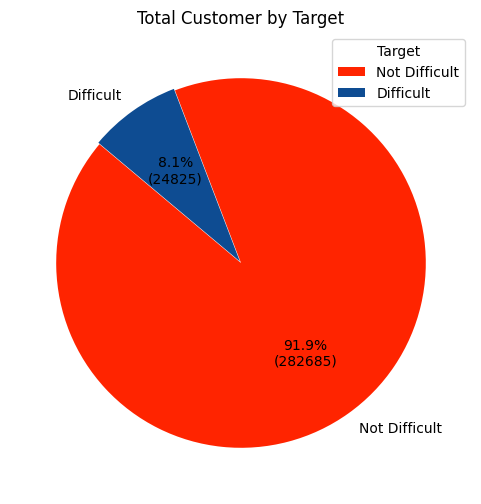

In [26]:
# Create Annotate Function
def func_autopcs(pct, count):
    total = int(pct/100.*sum(count))
    return f"{pct:.1f}%\n({total:d})"
    
# Plotting Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(target_counts, 
        labels=target_counts.index, autopct=lambda pct: func_autopcs(pct, target_counts), 
        startangle=140,
        colors=["#FF2400", "#0E4C92"],
        explode=(0, 0.01)
       )
plt.legend(loc='upper right', title='Target')
plt.title("Total Customer by Target")
plt.show()

In [27]:
# Create Aggregation Table based on Average Amount Credit
target_df = app_train.groupby(by=["TARGET_LABEL"])["AMT_CREDIT"].agg(["sum", "mean"])
target_df = target_df.reset_index()
target_df = target_df.rename(columns={"sum": "Total Amount Credit", "mean": "Average Amount Credit"})
target_df

,TARGET_LABEL,Total Amount Credit,Average Amount Credit
0,Difficult,1.384685e+10,557778.527674
1,Not Difficult,1.703602e+11,602648.282002


##### Total Amount Credit

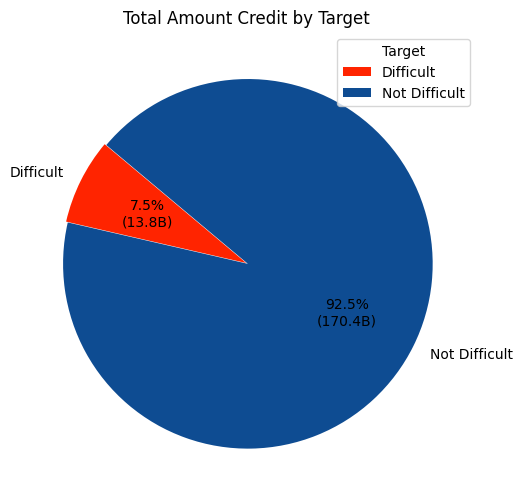

In [28]:
# Create Annotate Function
def func_autopcs(pct, count):
    total = int(pct/100.*sum(count))
    if total >= 1000000000:
        total_billion = round((total / 1000000000), 3)
        return f"{pct:.1f}%\n({total_billion:.1f}B)"
    else:
        return f"{pct:.1f}%\n({total:d})"
    
# Plotting Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(target_df["Total Amount Credit"], 
        labels=target_df["TARGET_LABEL"].unique(), autopct=lambda pct: func_autopcs(pct, target_df["Total Amount Credit"]), 
        startangle=140,
        colors=["#FF2400", "#0E4C92"],
        explode=(0, 0.01)
       )
plt.legend(loc='upper right', title='Target')
plt.title("Total Amount Credit by Target")
plt.show()

##### Average Amount Credit

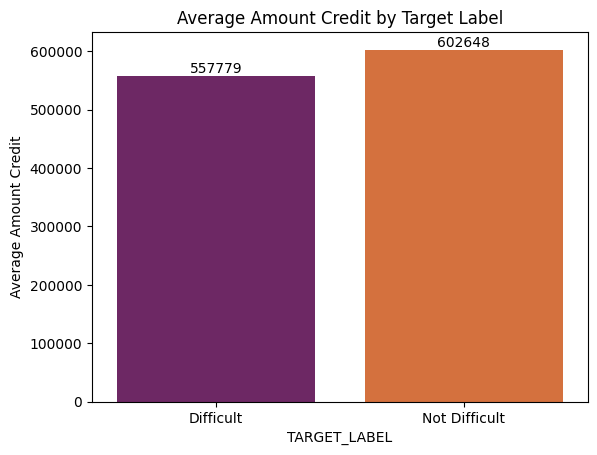

In [29]:
# Plotting Barplot
ax = sns.barplot(target_df, x="TARGET_LABEL", y="Average Amount Credit", palette="inferno")
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 5), 
                textcoords = 'offset points')
plt.title("Average Amount Credit by Target Label")
plt.show()

#### Code Gender

##### Total Customer

In [30]:
gender_counts = app_train['CODE_GENDER'].value_counts()
gender_counts

CODE_GENDER
F    202452
M    105059
Name: count, dtype: int64

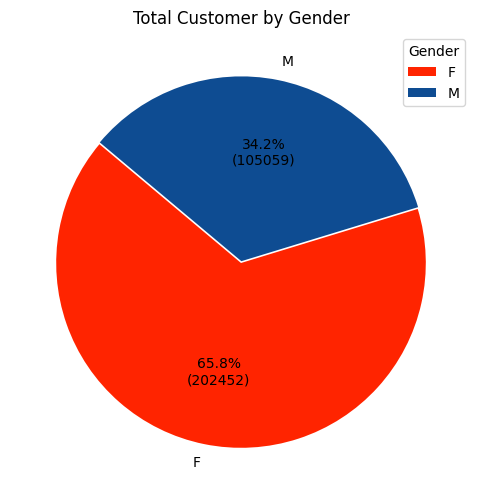

In [31]:
# Create Annotate Function
def func_autopcs(pct, count):
    total = int(pct/100.*sum(count))
    return f"{pct:.1f}%\n({total:d})"
    
# Plotting Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, 
        labels=gender_counts.index, autopct=lambda pct: func_autopcs(pct, gender_counts), 
        startangle=140,
        colors=["#FF2400", "#0E4C92"],
        explode=(0, 0.01)
       )
plt.legend(loc='upper right', title='Gender')
plt.title("Total Customer by Gender")
plt.show()

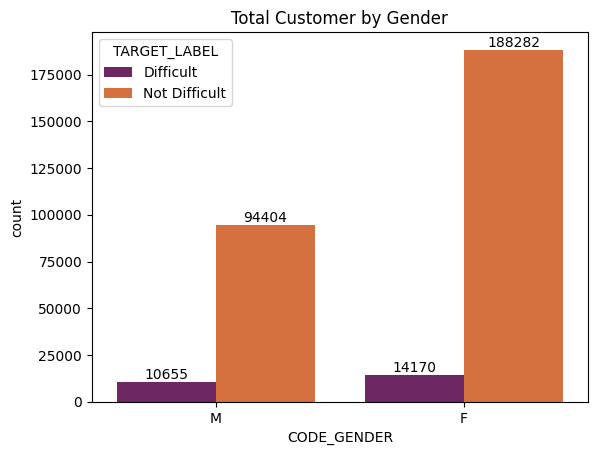

In [32]:
# Plotting Countplot Chart
ax = sns.countplot(app_train, x="CODE_GENDER", hue="TARGET_LABEL", palette="inferno")

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 5), 
                textcoords = 'offset points')
plt.title("Total Customer by Gender")
plt.show()

##### Average Amount Credit

In [33]:
# Create Aggregation Table based on Average Amount Credit
gender_df = app_train.groupby(by=["TARGET_LABEL", "CODE_GENDER"])["AMT_CREDIT"].agg(["mean"])
gender_df = gender_df.reset_index()
gender_df = gender_df.rename(columns={"mean": "Avg Amount Credit"})
gender_df

,TARGET_LABEL,CODE_GENDER,Avg Amount Credit
0,Difficult,F,561140.131757
1,Difficult,M,553307.957062
2,Not Difficult,F,595142.808224
3,Not Difficult,M,617617.410576


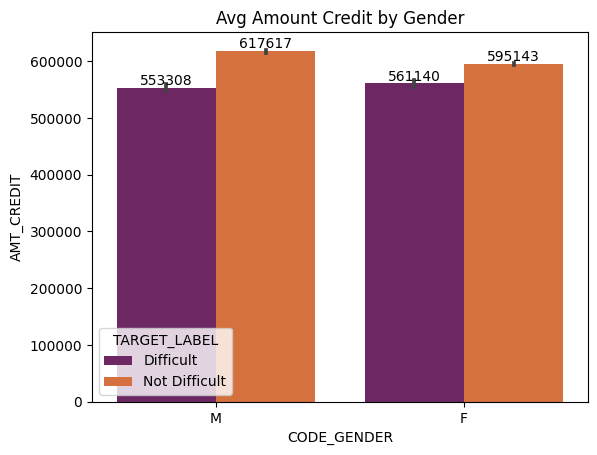

In [34]:
# Plotting Barplot
ax = sns.barplot(app_train, x="CODE_GENDER", y="AMT_CREDIT" ,hue="TARGET_LABEL", palette="inferno")
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 5), 
                textcoords = 'offset points')
plt.title("Avg Amount Credit by Gender")
plt.show()

#### Contract Type

##### Total Customer

In [35]:
contract_counts = app_train["NAME_CONTRACT_TYPE"].value_counts()
contract_counts

NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
Name: count, dtype: int64

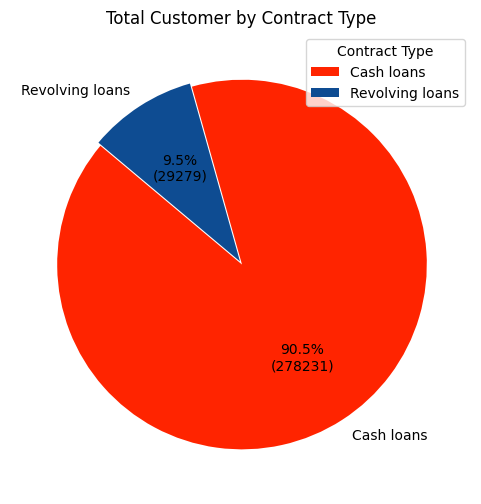

In [36]:
# Create Annotate Function
def func_autopcs(pct, count):
    total = int(pct/100.*sum(count))
    return f"{pct:.1f}%\n({total:d})"

# Membuat Pie chart
plt.figure(figsize=(6, 6))
plt.pie(contract_counts, 
        labels=contract_counts.index, autopct=lambda pct: func_autopcs(pct, contract_counts), 
        startangle=140,
        colors=["#FF2400", "#0E4C92"],
        explode=(0.01, 0.01)
       )
plt.title('Total Customer by Contract Type')

# Menambahkan nilai-nilai persentase
plt.legend(loc='upper right', title='Contract Type')
plt.show()

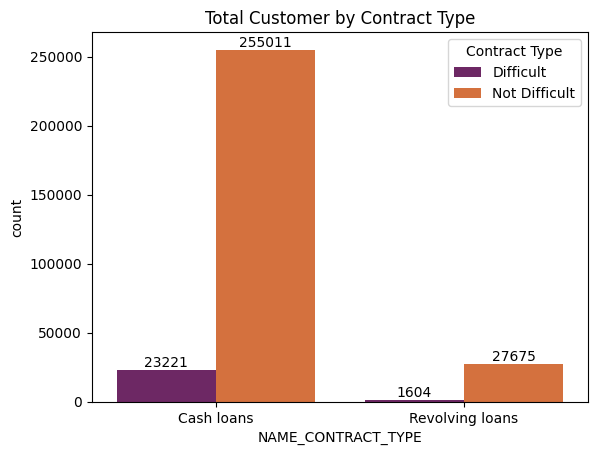

In [37]:
# Plotting Barchart
plt.title('Total Customer by Contract Type')
ax = sns.countplot(app_train, x="NAME_CONTRACT_TYPE", hue="TARGET_LABEL", palette="inferno")
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 5), 
                textcoords = 'offset points')
plt.legend(loc='upper right', title='Contract Type')
plt.show()

##### Average Amount Credit

In [38]:
# Create Aggregation Table
contract_type_df = app_train.groupby(by=["TARGET_LABEL", "NAME_CONTRACT_TYPE"])["AMT_CREDIT"].agg(["mean"])
contract_type_df = contract_type_df.reset_index()
contract_type_df = contract_type_df.rename(columns={"mean": "Avg Amount Credit"})
contract_type_df

,TARGET_LABEL,NAME_CONTRACT_TYPE,Avg Amount Credit
0,Difficult,Cash loans,578598.766181
1,Difficult,Revolving loans,256365.336658
2,Not Difficult,Cash loans,632461.030097
3,Not Difficult,Revolving loans,327939.024390


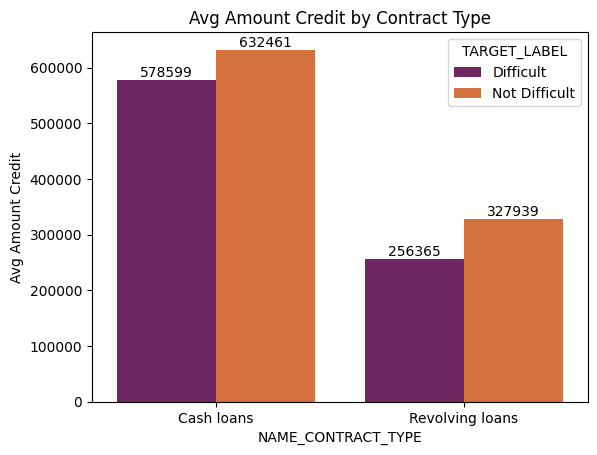

In [39]:
# Plotting Barplot
ax = sns.barplot(contract_type_df, x="NAME_CONTRACT_TYPE", y="Avg Amount Credit" ,hue="TARGET_LABEL", palette="inferno")
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 5), 
                textcoords = 'offset points')
plt.title("Avg Amount Credit by Contract Type")
plt.show()

#### Correlation between Amount Credit with Another Variable

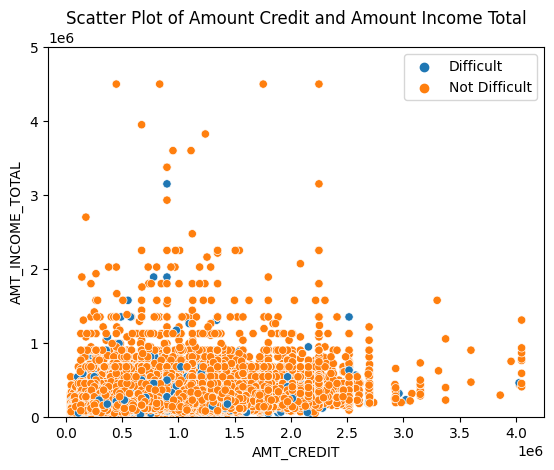

In [40]:
# Amount Income Total
sns.scatterplot(app_train, x="AMT_CREDIT", y="AMT_INCOME_TOTAL", hue="TARGET_LABEL")
plt.ylim(0, 5000000)
plt.title('Scatter Plot of Amount Credit and Amount Income Total')
plt.legend()
plt.show()

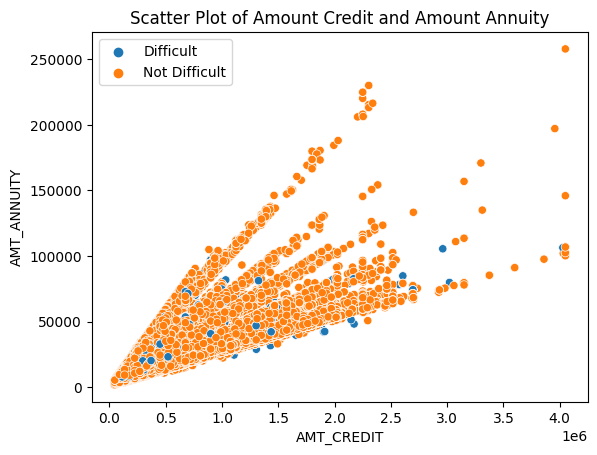

In [41]:
# Amount Income Total
sns.scatterplot(app_train, x="AMT_CREDIT", y="AMT_ANNUITY", hue="TARGET_LABEL")
plt.title('Scatter Plot of Amount Credit and Amount Annuity')
plt.legend()
plt.show()

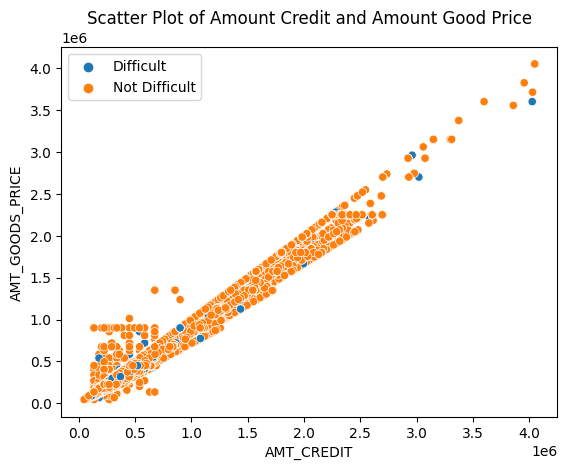

In [42]:
# Amount Income Total
sns.scatterplot(app_train, x="AMT_CREDIT", y="AMT_GOODS_PRICE", hue="TARGET_LABEL")
plt.title('Scatter Plot of Amount Credit and Amount Good Price')
plt.legend()
plt.show()

#### Others

##### Income Type

###### Total Customer

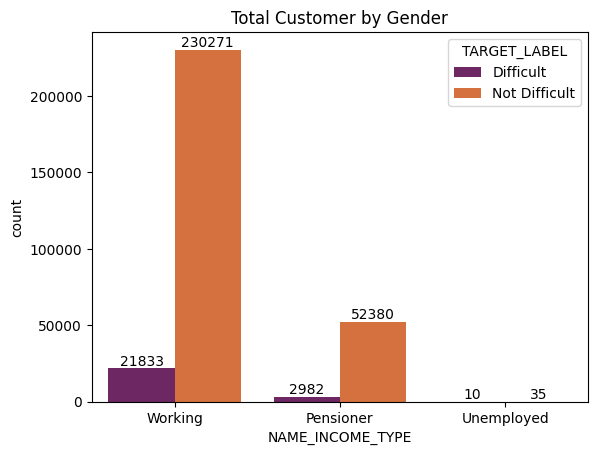

In [43]:
# Plotting Countplot Chart
ax = sns.countplot(app_train, x="NAME_INCOME_TYPE", hue="TARGET_LABEL", palette="inferno")

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 5), 
                textcoords = 'offset points')
plt.title("Total Customer by Gender")
plt.show()

###### Average Credit

In [44]:
# Create Aggregation Table
income_type_df = app_train.groupby(by=["TARGET_LABEL", "NAME_INCOME_TYPE"])["AMT_CREDIT"].agg(["mean"])
income_type_df = income_type_df.reset_index()
income_type_df = income_type_df.rename(columns={"mean": "Avg Amount Credit"})
income_type_df

,TARGET_LABEL,NAME_INCOME_TYPE,Avg Amount Credit
0,Difficult,Pensioner,558038.827968
1,Difficult,Unemployed,687150.000000
2,Difficult,Working,557683.720263
3,Not Difficult,Pensioner,541664.051375
4,Not Difficult,Unemployed,653933.571429
5,Not Difficult,Working,616512.637544


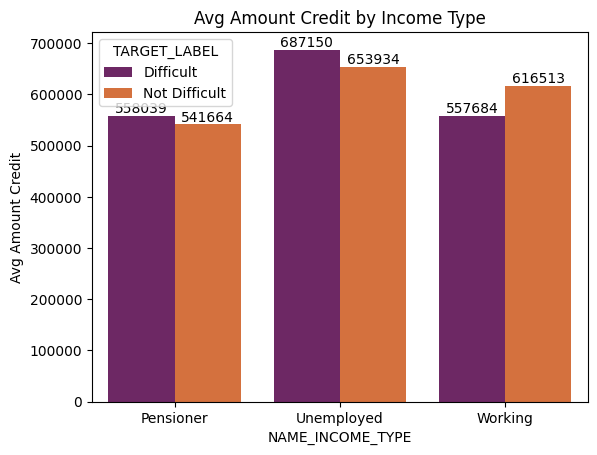

In [45]:
# Plotting Barplot
ax = sns.barplot(income_type_df, x="NAME_INCOME_TYPE", y="Avg Amount Credit" ,hue="TARGET_LABEL", palette="inferno")
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 5), 
                textcoords = 'offset points')
plt.title("Avg Amount Credit by Income Type")
plt.show()

##### Education Type

###### Total Customer

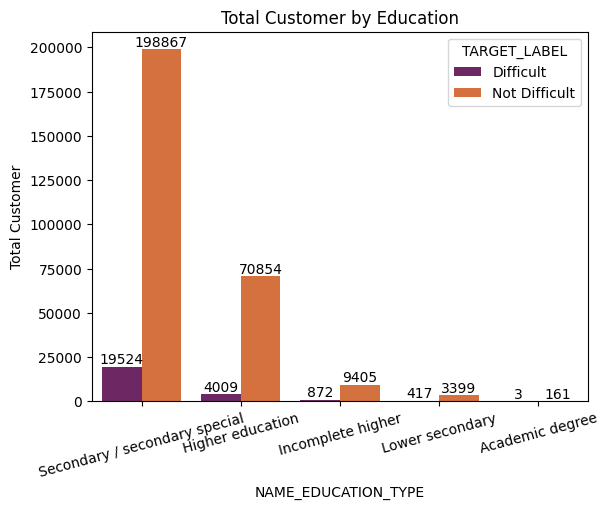

In [46]:
# Plotting Countplot Chart
ax = sns.countplot(app_train, x="NAME_EDUCATION_TYPE", hue="TARGET_LABEL", palette="inferno")

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 5), 
                textcoords = 'offset points')
plt.title("Total Customer by Education")
plt.ylabel("Total Customer")
plt.xticks(fontsize=10, rotation=15) 
plt.show()

###### Average Credit

In [47]:
# Create Aggregation Table
education_type_df = app_train.groupby(by=["TARGET_LABEL", "NAME_EDUCATION_TYPE"])["AMT_CREDIT"].agg(["mean"])
education_type_df = education_type_df.reset_index()
education_type_df = education_type_df.rename(columns={"mean": "Avg Amount Credit"})
education_type_df

,TARGET_LABEL,NAME_EDUCATION_TYPE,Avg Amount Credit
0,Difficult,Academic degree,950245.500000
1,Difficult,Higher education,645981.010851
2,Difficult,Incomplete higher,534740.986239
3,Difficult,Lower secondary,481589.525180
4,Difficult,Secondary / secondary special,542263.182160
5,Not Difficult,Academic degree,719290.844720
6,Not Difficult,Higher education,692438.297379
7,Not Difficult,Incomplete higher,569696.524880
8,Not Difficult,Lower secondary,490749.537511
9,Not Difficult,Secondary / secondary special,574033.649640


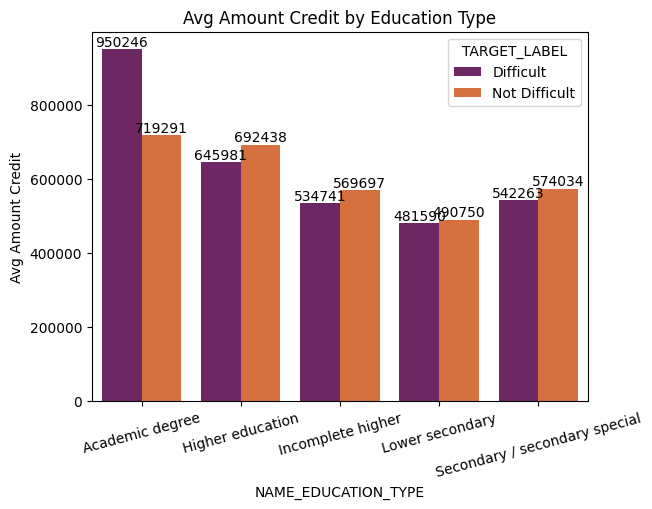

In [48]:
# Plotting Barplot
ax = sns.barplot(education_type_df, x="NAME_EDUCATION_TYPE", y="Avg Amount Credit" ,hue="TARGET_LABEL", palette="inferno")
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 5), 
                textcoords = 'offset points')
plt.xticks(fontsize=10, rotation=15) 
plt.title("Avg Amount Credit by Education Type")
plt.show()

##### Family Status

###### Total Customer

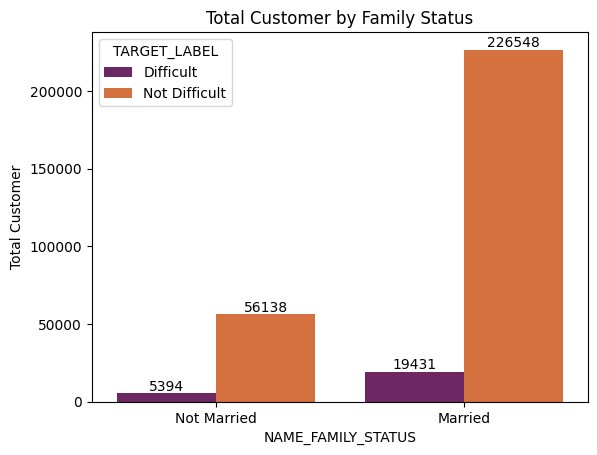

In [49]:
# Plotting Countplot Chart
ax = sns.countplot(app_train, x="NAME_FAMILY_STATUS", hue="TARGET_LABEL", palette="inferno")

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 5), 
                textcoords = 'offset points')
plt.title("Total Customer by Family Status")
plt.ylabel("Total Customer")
plt.show()

###### Average Amount Credit

In [50]:
# Create Aggregation Table
family_status_df = app_train.groupby(by=["TARGET_LABEL", "NAME_FAMILY_STATUS"])["AMT_CREDIT"].agg(["mean"])
family_status_df = family_status_df.reset_index()
family_status_df = family_status_df.rename(columns={"mean": "Avg Amount Credit"})
family_status_df

,TARGET_LABEL,NAME_FAMILY_STATUS,Avg Amount Credit
0,Difficult,Married,577532.178786
1,Difficult,Not Married,486619.240545
2,Not Difficult,Married,627353.175155
3,Not Difficult,Not Married,502950.321013


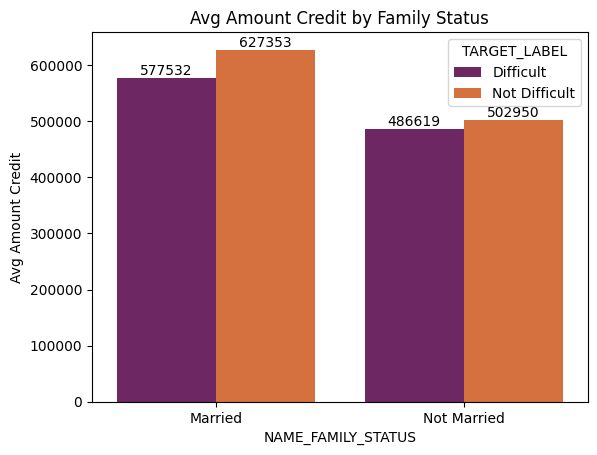

In [51]:
# Plotting Barplot
ax = sns.barplot(family_status_df, x="NAME_FAMILY_STATUS", y="Avg Amount Credit" ,hue="TARGET_LABEL", palette="inferno")
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 5), 
                textcoords = 'offset points')
plt.title("Avg Amount Credit by Family Status")
plt.show()

##### House Type

###### Total Customer

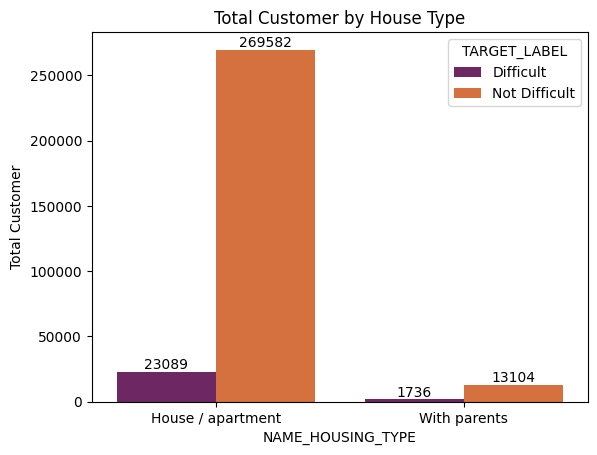

In [52]:
# Plotting Countplot Chart
ax = sns.countplot(app_train, x="NAME_HOUSING_TYPE", hue="TARGET_LABEL", palette="inferno")

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 5), 
                textcoords = 'offset points')
plt.title("Total Customer by House Type")
plt.ylabel("Total Customer")
plt.show()

###### Average Amount Credit

In [53]:
# Create Aggregation Table
house_type_df = app_train.groupby(by=["TARGET_LABEL", "NAME_HOUSING_TYPE"])["AMT_CREDIT"].agg(["mean"])
house_type_df = house_type_df.reset_index()
house_type_df = house_type_df.rename(columns={"mean": "Avg Amount Credit"})
house_type_df

,TARGET_LABEL,NAME_HOUSING_TYPE,Avg Amount Credit
0,Difficult,House / apartment,563405.465330
1,Difficult,With parents,482939.608583
2,Not Difficult,House / apartment,607171.396824
3,Not Difficult,With parents,509596.516140


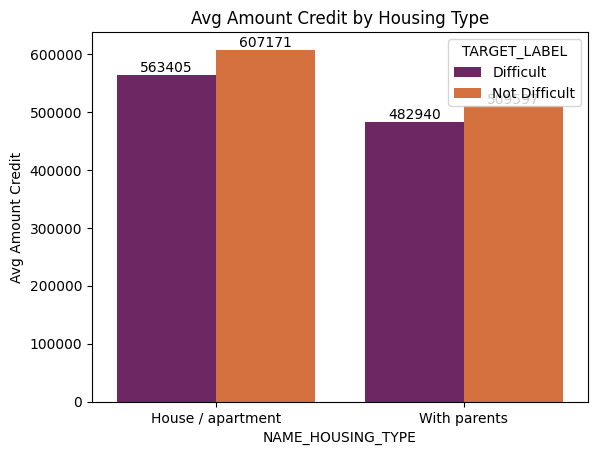

In [54]:
# Plotting Barplot
ax = sns.barplot(house_type_df, x="NAME_HOUSING_TYPE", y="Avg Amount Credit" ,hue="TARGET_LABEL", palette="inferno")
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 5), 
                textcoords = 'offset points')
plt.title("Avg Amount Credit by Housing Type")
plt.show()

##### Region Rating

###### Total Customer

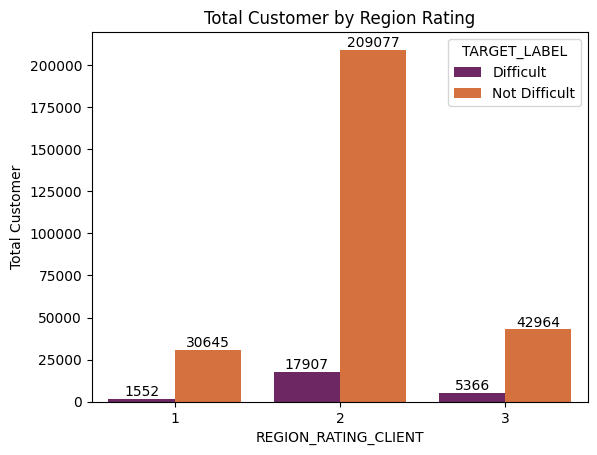

In [55]:
# Plotting Countplot Chart
ax = sns.countplot(app_train, x="REGION_RATING_CLIENT", hue="TARGET_LABEL", palette="inferno")

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 5), 
                textcoords = 'offset points')
plt.title("Total Customer by Region Rating")
plt.ylabel("Total Customer")
plt.show()

###### Average Amount Credit

In [56]:
# Create Aggregation Table
region_rating_df = app_train.groupby(by=["TARGET_LABEL", "REGION_RATING_CLIENT"])["AMT_CREDIT"].agg(["mean"])
region_rating_df = region_rating_df.reset_index()
region_rating_df = region_rating_df.rename(columns={"mean": "Avg Amount Credit"})
region_rating_df

,TARGET_LABEL,REGION_RATING_CLIENT,Avg Amount Credit
0,Difficult,1,683270.457796
1,Difficult,2,550383.052270
2,Difficult,3,546162.296310
3,Not Difficult,1,763876.060793
4,Not Difficult,2,584285.600415
5,Not Difficult,3,577007.957476


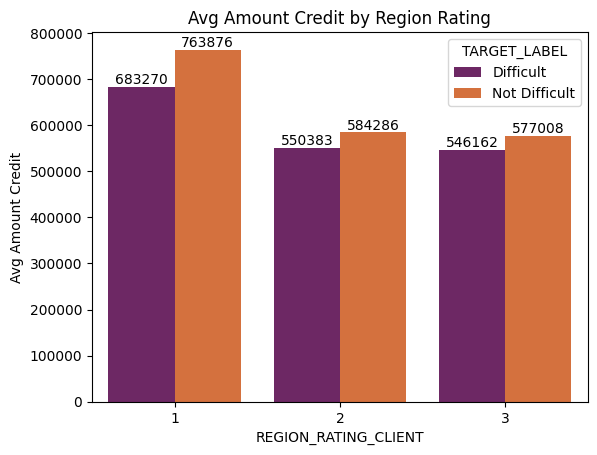

In [57]:
# Plotting Barplot
ax = sns.barplot(region_rating_df, x="REGION_RATING_CLIENT", y="Avg Amount Credit" ,hue="TARGET_LABEL", palette="inferno")
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 5), 
                textcoords = 'offset points')
plt.title("Avg Amount Credit by Region Rating")
plt.show()

##### Region Rating with City

###### Total Customer

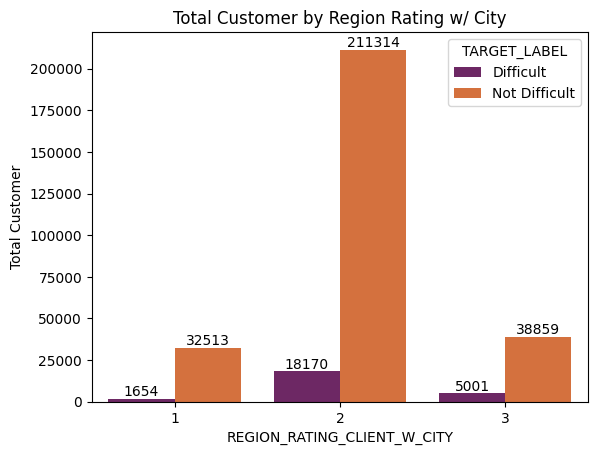

In [58]:
# Plotting Countplot Chart
ax = sns.countplot(app_train, x="REGION_RATING_CLIENT_W_CITY", hue="TARGET_LABEL", palette="inferno")

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 5), 
                textcoords = 'offset points')
plt.title("Total Customer by Region Rating w/ City")
plt.ylabel("Total Customer")
plt.show()

###### Average Amount Credit

In [59]:
# Create Aggregation Table
region_city_rating_df = app_train.groupby(by=["TARGET_LABEL", "REGION_RATING_CLIENT_W_CITY"])["AMT_CREDIT"].agg(["mean"])
region_city_rating_df = region_city_rating_df.reset_index()
region_city_rating_df = region_city_rating_df.rename(columns={"mean": "Avg Amount Credit"})
region_city_rating_df

,TARGET_LABEL,REGION_RATING_CLIENT_W_CITY,Avg Amount Credit
0,Difficult,1,685642.135429
1,Difficult,2,551388.209191
2,Difficult,3,538707.477804
3,Not Difficult,1,761850.116815
4,Not Difficult,2,584321.875508
5,Not Difficult,3,569103.852312


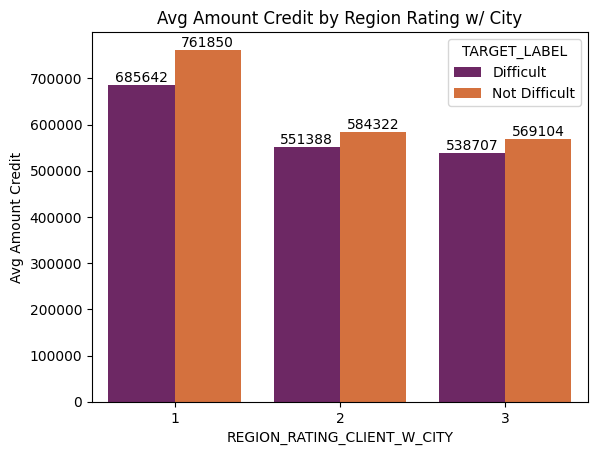

In [60]:
# Plotting Barplot
ax = sns.barplot(region_city_rating_df, x="REGION_RATING_CLIENT_W_CITY", y="Avg Amount Credit" ,hue="TARGET_LABEL", palette="inferno")
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 5), 
                textcoords = 'offset points')
plt.title("Avg Amount Credit by Region Rating w/ City")
plt.show()

### Feature Engineering

#### Label Encoder

In [61]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET_LABEL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,Difficult
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Not Difficult
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Not Difficult
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Not Difficult
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Not Difficult


In [62]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [63]:
# Name Contract Type
# {0: Cash Loan, 1:Revolving Loans}
app_train["NAME_CONTRACT_TYPE"] = le.fit_transform(app_train["NAME_CONTRACT_TYPE"])

In [64]:
# Gender
# {0: F, 1:M}
app_train["CODE_GENDER"] = le.fit_transform(app_train["CODE_GENDER"])

In [65]:
# Flag Own Car
# {0: N, 1:Y}
app_train["FLAG_OWN_CAR"] = le.fit_transform(app_train["FLAG_OWN_CAR"])

In [66]:
# Flag Own Car
# {0: N, 1:Y}
app_train["FLAG_OWN_REALTY"] = le.fit_transform(app_train["FLAG_OWN_REALTY"])

In [67]:
# Income Type
# {0: Pensioner, 1:Unemployed, 2:Working}
app_train["NAME_INCOME_TYPE"] = le.fit_transform(app_train["NAME_INCOME_TYPE"])

In [68]:
# Suite Type
# {0: Children, 1:Family, 2:Group of People, 3:Other_A, 4:Other_B, 5:Spouse, partner, 6:Unaccompanied, 7:NaN}
app_train["NAME_TYPE_SUITE"] = le.fit_transform(app_train["NAME_TYPE_SUITE"])

In [69]:
# Education Type
# {0: Academic Degree, 1:Higher Education, 2:Incomplete Higher, 3:Lower Secondary, 4:Secondary / Secondary Special}
app_train["NAME_EDUCATION_TYPE"] = le.fit_transform(app_train["NAME_EDUCATION_TYPE"])

In [70]:
# Family Status
# {0: Married, 1:Not Married}
app_train["NAME_FAMILY_STATUS"] = le.fit_transform(app_train["NAME_FAMILY_STATUS"])

In [71]:
# House Type
# {0: House/Apartment, 1:With parents}
app_train["NAME_HOUSING_TYPE"] = le.fit_transform(app_train["NAME_HOUSING_TYPE"])

##### Drop Columns with object type

In [72]:
list_object_cols = app_train.select_dtypes(include=['object']).columns.tolist()
list_object_cols

['OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE',
 'TARGET_LABEL']

In [73]:
app_train = app_train.drop(columns=list_object_cols)

#### Feature Selection

##### Spliting Dependent and Independente Variabel

In [74]:
X = app_train.drop(columns=["TARGET", "SK_ID_CURR"])
y = app_train["TARGET"]

##### Drop Column with Null Values

In [75]:
# Drop column with null values > 1000
null_values = X.isnull().sum()
X_null_col = null_values[null_values > 1000].index.tolist()
X_new = X.drop(columns=X_null_col)

In [76]:
# fill column with null value <= 1000 with median values
X_new = X_new.fillna(0)

In [77]:
# Checking null values
X_new.isnull().sum()

NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
HOUR_APPR_PROCESS_START        0
REG_REGION_NOT_LIVE_REGION     0
REG_REGION

##### Abs Negative Values

In [78]:
# Absolute Negative Values
negative_values = X_new[X_new < 0]
X_new[negative_values.columns] = X_new[negative_values.columns].abs()

In [79]:
# Checking Negative Values
(X_new < 0).sum()

NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
HOUR_APPR_PROCESS_START        0
REG_REGION_NOT_LIVE_REGION     0
REG_REGION

##### Model Selection

In [80]:
corr_df = X_new
corr_df["TARGET"] = y

correlations = abs(corr_df.corr())
selected_column = correlations["TARGET"].drop("TARGET").nlargest(20).index.tolist()
selected_column

['EXT_SOURCE_2',
 'DAYS_BIRTH',
 'REGION_RATING_CLIENT_W_CITY',
 'REGION_RATING_CLIENT',
 'DAYS_LAST_PHONE_CHANGE',
 'CODE_GENDER',
 'NAME_EDUCATION_TYPE',
 'DAYS_ID_PUBLISH',
 'REG_CITY_NOT_WORK_CITY',
 'DAYS_EMPLOYED',
 'NAME_INCOME_TYPE',
 'FLAG_EMP_PHONE',
 'REG_CITY_NOT_LIVE_CITY',
 'FLAG_DOCUMENT_3',
 'DAYS_REGISTRATION',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'LIVE_CITY_NOT_WORK_CITY',
 'NAME_CONTRACT_TYPE',
 'AMT_CREDIT']

In [81]:
# Selected Column based on Kbest Selection
X_selected = X_new[selected_column]
X_selected

,EXT_SOURCE_2,DAYS_BIRTH,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,DAYS_LAST_PHONE_CHANGE,CODE_GENDER,NAME_EDUCATION_TYPE,DAYS_ID_PUBLISH,REG_CITY_NOT_WORK_CITY,DAYS_EMPLOYED,NAME_INCOME_TYPE,FLAG_EMP_PHONE,REG_CITY_NOT_LIVE_CITY,FLAG_DOCUMENT_3,DAYS_REGISTRATION,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,LIVE_CITY_NOT_WORK_CITY,NAME_CONTRACT_TYPE,AMT_CREDIT
0,0.262949,9461,2,2,1134.0,1,4,2120,0,637,2,1,0,1,3648.0,351000.0,0.018801,0,0,406597.5
1,0.622246,16765,1,1,828.0,0,1,291,0,1188,2,1,0,1,1186.0,1129500.0,0.003541,0,0,1293502.5
2,0.555912,19046,2,2,815.0,1,4,2531,0,225,2,1,0,0,4260.0,135000.0,0.010032,0,1,135000.0
3,0.650442,19005,2,2,617.0,0,4,2437,0,3039,2,1,0,1,9833.0,297000.0,0.008019,0,0,312682.5
4,0.322738,19932,2,2,1106.0,1,4,3458,1,3038,2,1,0,0,4311.0,513000.0,0.028663,1,0,513000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0.681632,9327,1,1,273.0,1,4,1982,0,236,2,1,0,0,8456.0,225000.0,0.032561,0,0,254700.0
307507,0.115992,20775,2,2,0.0,0,4,4090,0,365243,0,0,0,1,4388.0,225000.0,0.025164,0,0,269550.0
307508,0.535722,14966,3,3,1909.0,0,1,5150,1,7921,2,1,0,1,6737.0,585000.0,0.005002,1,0,677664.0
307509,0.514163,11961,2,2,322.0,0,4,931,1,4786,2,1,1,1,2562.0,319500.0,0.005313,0,0,370107.0


##### Scaling Data

In [82]:
from sklearn.preprocessing import MinMaxScaler

In [83]:
mms_credit = MinMaxScaler()
X_selected.loc[:, "AMT_CREDIT_SCALED"] = mms_credit.fit_transform(X_selected.loc[:, "AMT_CREDIT"].values.reshape(-1, 1))

C:\Users\Acer\AppData\Local\Temp\ipykernel_5380\2373638925.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_selected.loc[:, "AMT_CREDIT_SCALED"] = mms_credit.fit_transform(X_selected.loc[:, "AMT_CREDIT"].values.reshape(-1, 1))


In [84]:
mms_goods_price = MinMaxScaler()
X_selected.loc[:, "AMT_GOODS_PRICE_SCALED"] = mms_goods_price.fit_transform(X_selected.loc[:, "AMT_GOODS_PRICE"].values.reshape(-1, 1))

C:\Users\Acer\AppData\Local\Temp\ipykernel_5380\1330588889.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_selected.loc[:, "AMT_GOODS_PRICE_SCALED"] = mms_goods_price.fit_transform(X_selected.loc[:, "AMT_GOODS_PRICE"].values.reshape(-1, 1))


In [85]:
mms_days_birth = MinMaxScaler()
X_selected.loc[:, "DAYS_BIRTH_SCALED"] = mms_days_birth.fit_transform(X_selected.loc[:, 'DAYS_BIRTH'].values.reshape(-1, 1))

C:\Users\Acer\AppData\Local\Temp\ipykernel_5380\1295588420.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_selected.loc[:, "DAYS_BIRTH_SCALED"] = mms_days_birth.fit_transform(X_selected.loc[:, 'DAYS_BIRTH'].values.reshape(-1, 1))


In [86]:
mms_days_last_phone_change = MinMaxScaler()
X_selected.loc[:, "DAYS_LAST_PHONE_CHANGE_SCALED"] = mms_days_last_phone_change.fit_transform(X_selected.loc[:, "DAYS_LAST_PHONE_CHANGE"].values.reshape(-1, 1))

C:\Users\Acer\AppData\Local\Temp\ipykernel_5380\2748037864.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_selected.loc[:, "DAYS_LAST_PHONE_CHANGE_SCALED"] = mms_days_last_phone_change.fit_transform(X_selected.loc[:, "DAYS_LAST_PHONE_CHANGE"].values.reshape(-1, 1))


In [87]:
mms_days_id_publish = MinMaxScaler()
X_selected.loc[:, "DAYS_ID_PUBLISH_SCALED"] = mms_days_id_publish.fit_transform(X_selected.loc[:, "DAYS_ID_PUBLISH"].values.reshape(-1, 1))

C:\Users\Acer\AppData\Local\Temp\ipykernel_5380\2664123766.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_selected.loc[:, "DAYS_ID_PUBLISH_SCALED"] = mms_days_id_publish.fit_transform(X_selected.loc[:, "DAYS_ID_PUBLISH"].values.reshape(-1, 1))


In [88]:
mms_days_employed = MinMaxScaler()
X_selected.loc[:, "DAYS_EMPLOYED_SCALED"] = mms_days_employed.fit_transform(X_selected.loc[:, "DAYS_EMPLOYED"].values.reshape(-1, 1))

C:\Users\Acer\AppData\Local\Temp\ipykernel_5380\154480478.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_selected.loc[:, "DAYS_EMPLOYED_SCALED"] = mms_days_employed.fit_transform(X_selected.loc[:, "DAYS_EMPLOYED"].values.reshape(-1, 1))


In [89]:
mms_days_registration = MinMaxScaler()
X_selected.loc[:, "DAYS_REGISTRATION_SCALED"] = mms_days_registration.fit_transform(X_selected.loc[:, "DAYS_REGISTRATION"].values.reshape(-1, 1))

C:\Users\Acer\AppData\Local\Temp\ipykernel_5380\460816356.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_selected.loc[:, "DAYS_REGISTRATION_SCALED"] = mms_days_registration.fit_transform(X_selected.loc[:, "DAYS_REGISTRATION"].values.reshape(-1, 1))


In [90]:
X_selected = X_selected.drop(columns=["AMT_CREDIT", "AMT_GOODS_PRICE", "DAYS_BIRTH", 
                                      "DAYS_LAST_PHONE_CHANGE", "DAYS_ID_PUBLISH", "DAYS_EMPLOYED", "DAYS_REGISTRATION"])

#### Training Model

##### Model Selection

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=0)

In [92]:
def model_selection(model, x, y, cv_num):
    # Splitting Dependent and Independent Variable
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
    # Fitting and Training Model
    model.fit(X_train, y_train)
    # Accuracy Model
    acc_score = round(model.score(X_test, y_test) * 100, 2)
    print(f"Accuracy Score: {acc_score}%")
    # Accuracy Model with Cross Validation Score
    val_acc_score = cross_val_score(model, x, y, cv=cv_num)
    avg_val_score = round(np.mean(val_acc_score)*100, 2)
    print(f"Average Validation Score: {avg_val_score}%")

    return acc_score, avg_val_score

###### Logistic Regression

In [93]:
# Checking Accuracy and Cross Validation Score with Logistic Regression Model
lr = LogisticRegression(max_iter=1000)
lr_score = model_selection(lr, X_selected, y, 3)

Accuracy Score: 92.1%
Average Validation Score: 91.93%


In [94]:
y_pred = lr.predict(X_test)

cp = classification_report(y_test, y_pred)
print(f"Classification Report: \n {cp}")

Classification Report: 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     84914
           1       0.25      0.00      0.00      7340

    accuracy                           0.92     92254
   macro avg       0.59      0.50      0.48     92254
weighted avg       0.87      0.92      0.88     92254



###### Decision Tree

In [95]:
# Checking Accuracy and Cross Validation Score with Decision Tree Model
dt = DecisionTreeClassifier() 
dt_score = model_selection(dt, X_selected, y, 3)

Accuracy Score: 84.94%
Average Validation Score: 84.73%


In [96]:
y_pred = dt.predict(X_test)

cp = classification_report(y_test, y_pred)
print(f"Classification Report: \n {cp}")

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.94      0.95     84914
           1       0.39      0.44      0.41      7340

    accuracy                           0.90     92254
   macro avg       0.67      0.69      0.68     92254
weighted avg       0.91      0.90      0.90     92254



###### Extra Tree

In [97]:
# Checking Accuracy and Cross Validation Score with Extra Tree Model
et = ExtraTreeClassifier()
et_score = model_selection(et, X_selected, y, 3)

Accuracy Score: 85.44%
Average Validation Score: 85.38%


In [98]:
y_pred = et.predict(X_test)

cp = classification_report(y_test, y_pred)
print(f"Classification Report: \n {cp}")

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.94      0.95     84914
           1       0.40      0.43      0.41      7340

    accuracy                           0.90     92254
   macro avg       0.67      0.69      0.68     92254
weighted avg       0.91      0.90      0.90     92254



###### Random Forest

In [99]:
#Checking Accuracy and Cross Validation Score with Random Forrest Model
rf = RandomForestClassifier()
rf_score = model_selection(rf, X_selected, y, 3)

Accuracy Score: 92.11%
Average Validation Score: 91.92%


In [100]:
y_pred = rf.predict(X_test)

In [101]:
cp = classification_report(y_test, y_pred)
print(f"Classification Report: \n {cp}")

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97     84914
           1       1.00      0.34      0.51      7340

    accuracy                           0.95     92254
   macro avg       0.97      0.67      0.74     92254
weighted avg       0.95      0.95      0.94     92254



In [102]:
# Save best Model
joblib.dump(rf, "random_forest_model.pkl")

['random_forest_model.pkl']

In [103]:
# load best Model
rf = joblib.load("random_forest_model.pkl")

In [104]:
y_pred = rf.predict(X_test)

cp = classification_report(y_test, y_pred)
print(f"Classification Report: \n {cp}")

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97     84914
           1       1.00      0.34      0.51      7340

    accuracy                           0.95     92254
   macro avg       0.97      0.67      0.74     92254
weighted avg       0.95      0.95      0.94     92254



#### Predict Test Dataset with Model

In [105]:
# # Selection Column for app_test
app_test = app_test[selected_column]
app_test.columns

Index(['EXT_SOURCE_2', 'DAYS_BIRTH', 'REGION_RATING_CLIENT_W_CITY',
       'REGION_RATING_CLIENT', 'DAYS_LAST_PHONE_CHANGE', 'CODE_GENDER',
       'NAME_EDUCATION_TYPE', 'DAYS_ID_PUBLISH', 'REG_CITY_NOT_WORK_CITY',
       'DAYS_EMPLOYED', 'NAME_INCOME_TYPE', 'FLAG_EMP_PHONE',
       'REG_CITY_NOT_LIVE_CITY', 'FLAG_DOCUMENT_3', 'DAYS_REGISTRATION',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
       'LIVE_CITY_NOT_WORK_CITY', 'NAME_CONTRACT_TYPE', 'AMT_CREDIT'],
      dtype='object')

In [106]:
# # Label Encoding Code Gender
app_test["CODE_GENDER"] = le.fit_transform(app_test["CODE_GENDER"])

In [107]:
# # Fill num value with zero values
app_test = app_test.fillna(0)
null_values = app_test.isnull().sum()
null_values

EXT_SOURCE_2                   0
DAYS_BIRTH                     0
REGION_RATING_CLIENT_W_CITY    0
REGION_RATING_CLIENT           0
DAYS_LAST_PHONE_CHANGE         0
CODE_GENDER                    0
NAME_EDUCATION_TYPE            0
DAYS_ID_PUBLISH                0
REG_CITY_NOT_WORK_CITY         0
DAYS_EMPLOYED                  0
NAME_INCOME_TYPE               0
FLAG_EMP_PHONE                 0
REG_CITY_NOT_LIVE_CITY         0
FLAG_DOCUMENT_3                0
DAYS_REGISTRATION              0
AMT_GOODS_PRICE                0
REGION_POPULATION_RELATIVE     0
LIVE_CITY_NOT_WORK_CITY        0
NAME_CONTRACT_TYPE             0
AMT_CREDIT                     0
dtype: int64

In [108]:
# Education Type
app_test["NAME_EDUCATION_TYPE"] = le.fit_transform(app_test["NAME_EDUCATION_TYPE"])

In [109]:
# Income Type
app_test["NAME_INCOME_TYPE"] = app_test["NAME_INCOME_TYPE"].replace("Commercial associate", "Working")
app_test["NAME_INCOME_TYPE"] = app_test["NAME_INCOME_TYPE"].replace("State servant", "Working")
app_test["NAME_INCOME_TYPE"] = app_test["NAME_INCOME_TYPE"].replace("Student", "Unemployed")
app_test["NAME_INCOME_TYPE"] = app_test["NAME_INCOME_TYPE"].replace("Businessman", "Working")
app_test["NAME_INCOME_TYPE"] = app_test["NAME_INCOME_TYPE"].replace("Maternity leave", "Unemployed")

app_test["NAME_INCOME_TYPE"] = le.fit_transform(app_test["NAME_INCOME_TYPE"])

In [110]:
# Contract Type
app_test["NAME_CONTRACT_TYPE"] = le.fit_transform(app_test["NAME_CONTRACT_TYPE"])

In [111]:
app_test.head()

,EXT_SOURCE_2,DAYS_BIRTH,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,DAYS_LAST_PHONE_CHANGE,CODE_GENDER,NAME_EDUCATION_TYPE,DAYS_ID_PUBLISH,REG_CITY_NOT_WORK_CITY,DAYS_EMPLOYED,NAME_INCOME_TYPE,FLAG_EMP_PHONE,REG_CITY_NOT_LIVE_CITY,FLAG_DOCUMENT_3,DAYS_REGISTRATION,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,LIVE_CITY_NOT_WORK_CITY,NAME_CONTRACT_TYPE,AMT_CREDIT
0,0.789654,-19241,2,2,-1740.0,0,1,-812,0,-2329,2,1,0,1,-5170.0,450000.0,0.018850,0,0,568800.0
1,0.291656,-18064,2,2,0.0,1,4,-1623,0,-4469,2,1,0,1,-9118.0,180000.0,0.035792,0,0,222768.0
2,0.699787,-20038,2,2,-856.0,1,1,-3503,0,-4458,2,1,0,0,-2175.0,630000.0,0.019101,0,0,663264.0
3,0.509677,-13976,2,2,-1805.0,0,4,-4208,0,-1866,2,1,0,1,-2000.0,1575000.0,0.026392,0,0,1575000.0
4,0.425687,-13040,2,2,-821.0,1,4,-4262,1,-2191,2,1,0,1,-4000.0,625500.0,0.010032,1,0,625500.0


In [112]:
# # Abs Negative Values
negative_values = app_test[app_test < 0]
app_test[negative_values.columns] = app_test[negative_values.columns].abs()

In [113]:
# # Min Max Scaled
app_test.loc[:, "AMT_CREDIT_SCALED"] = mms_credit.transform(app_test.loc[:, "AMT_CREDIT"].values.reshape(-1, 1))
app_test.loc[:, "AMT_GOODS_PRICE_SCALED"] = mms_goods_price.transform(app_test.loc[:, "AMT_GOODS_PRICE"].values.reshape(-1, 1))
app_test.loc[:, "DAYS_BIRTH_SCALED"] = mms_days_birth.transform(app_test.loc[:, "DAYS_BIRTH"].values.reshape(-1, 1))
app_test.loc[:, "DAYS_LAST_PHONE_CHANGE_SCALED"] = mms_days_last_phone_change.transform(app_test.loc[:, "DAYS_LAST_PHONE_CHANGE"].values.reshape(-1, 1))
app_test.loc[:, "DAYS_ID_PUBLISH_SCALED"] = mms_days_id_publish.transform(app_test.loc[:, "DAYS_ID_PUBLISH"].values.reshape(-1, 1))
app_test.loc[:, "DAYS_EMPLOYED_SCALED"] = mms_days_employed.transform(app_test.loc[:, "DAYS_EMPLOYED"].values.reshape(-1, 1))
app_test.loc[:, "DAYS_REGISTRATION_SCALED"] = mms_days_registration.transform(app_test.loc[:, "DAYS_REGISTRATION"].values.reshape(-1, 1))

In [114]:
# Drop Unnecesery Column
app_test = app_test.drop(columns=["AMT_CREDIT", "AMT_GOODS_PRICE", "DAYS_BIRTH", 
                                  "DAYS_LAST_PHONE_CHANGE", "DAYS_ID_PUBLISH", 
                                  "DAYS_EMPLOYED", "DAYS_REGISTRATION"])

###### Predict

In [115]:
X_selected

,EXT_SOURCE_2,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,CODE_GENDER,NAME_EDUCATION_TYPE,REG_CITY_NOT_WORK_CITY,NAME_INCOME_TYPE,FLAG_EMP_PHONE,REG_CITY_NOT_LIVE_CITY,FLAG_DOCUMENT_3,REGION_POPULATION_RELATIVE,LIVE_CITY_NOT_WORK_CITY,NAME_CONTRACT_TYPE,AMT_CREDIT_SCALED,AMT_GOODS_PRICE_SCALED,DAYS_BIRTH_SCALED,DAYS_LAST_PHONE_CHANGE_SCALED,DAYS_ID_PUBLISH_SCALED,DAYS_EMPLOYED_SCALED,DAYS_REGISTRATION_SCALED
0,0.262949,2,2,1,4,0,2,1,0,1,0.018801,0,0,0.090287,0.086667,0.111161,0.264212,0.294567,0.001744,0.147860
1,0.622246,1,1,0,1,0,2,1,0,1,0.003541,0,0,0.311736,0.278889,0.522886,0.192917,0.040434,0.003253,0.048071
2,0.555912,2,2,1,4,0,2,1,0,0,0.010032,0,1,0.022472,0.033333,0.651466,0.189888,0.351674,0.000616,0.172665
3,0.650442,2,2,0,4,0,2,1,0,1,0.008019,0,0,0.066837,0.073333,0.649154,0.143756,0.338613,0.008320,0.398549
4,0.322738,2,2,1,4,1,2,1,0,0,0.028663,1,0,0.116854,0.126667,0.701409,0.257689,0.480478,0.008318,0.174732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0.681632,1,1,1,4,0,2,1,0,0,0.032561,0,0,0.052360,0.055556,0.103608,0.063607,0.275393,0.000646,0.342737
307507,0.115992,2,2,0,4,0,0,0,0,1,0.025164,0,0,0.056067,0.055556,0.748929,0.000000,0.568292,1.000000,0.177853
307508,0.535722,3,3,0,1,1,2,1,0,1,0.005002,1,0,0.157969,0.144444,0.421477,0.444781,0.715576,0.021687,0.273063
307509,0.514163,2,2,0,4,1,2,1,1,1,0.005313,0,0,0.081175,0.078889,0.252086,0.075023,0.129359,0.013104,0.103842


In [116]:
prediction = rf.predict(app_test)

In [117]:
pred_df = pd.DataFrame(prediction, columns=["Prediction"])
pred_df.head()

,Prediction
0,0
1,0
2,0
3,0
4,0


In [118]:
pred_df["Prediction"].value_counts()

Prediction
0    48733
1       11
Name: count, dtype: int64

In [119]:
index_pred = pred_df[pred_df["Prediction"] == 1].index
index_pred

Index([3452, 24152, 24539, 25319, 26596, 33023, 36868, 37327, 38069, 41416,
       46845],
      dtype='int64')

In [120]:
predict_target_1 = app_test[app_test.index.isin(index_pred)]

In [121]:
# # Min Max Inverse Scaled
predict_target_1.loc[:, "AMT_CREDIT"] = mms_credit.inverse_transform(predict_target_1.loc[:, "AMT_CREDIT_SCALED"].values.reshape(-1, 1))
predict_target_1.loc[:, "AMT_GOODS_PRICE"] = mms_goods_price.inverse_transform(predict_target_1.loc[:, "AMT_GOODS_PRICE_SCALED"].values.reshape(-1, 1))
predict_target_1.loc[:, "DAYS_BIRTH"] = mms_days_birth.inverse_transform(predict_target_1.loc[:, "DAYS_BIRTH_SCALED"].values.reshape(-1, 1))
predict_target_1.loc[:, "DAYS_LAST_PHONE_CHANGE"] = mms_days_last_phone_change.inverse_transform(predict_target_1.loc[:, "DAYS_LAST_PHONE_CHANGE_SCALED"].values.reshape(-1, 1))
predict_target_1.loc[:, "DAYS_ID_PUBLISH"] = mms_days_id_publish.inverse_transform(predict_target_1.loc[:, "DAYS_ID_PUBLISH_SCALED"].values.reshape(-1, 1))
predict_target_1.loc[:, "DAYS_EMPLOYED"] = mms_days_employed.inverse_transform(predict_target_1.loc[:, "DAYS_EMPLOYED_SCALED"].values.reshape(-1, 1))
predict_target_1.loc[:, "DAYS_REGISTRATION"] = mms_days_registration.inverse_transform(predict_target_1.loc[:, "DAYS_REGISTRATION_SCALED"].values.reshape(-1, 1))

C:\Users\Acer\AppData\Local\Temp\ipykernel_5380\378496083.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predict_target_1.loc[:, "AMT_CREDIT"] = mms_credit.inverse_transform(predict_target_1.loc[:, "AMT_CREDIT_SCALED"].values.reshape(-1, 1))
C:\Users\Acer\AppData\Local\Temp\ipykernel_5380\378496083.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predict_target_1.loc[:, "AMT_GOODS_PRICE"] = mms_goods_price.inverse_transform(predict_target_1.loc[:, "AMT_GOODS_PRICE_SCALED"].values.reshape(-1, 1))
C:\

In [122]:
predict_target_1

,EXT_SOURCE_2,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,CODE_GENDER,NAME_EDUCATION_TYPE,REG_CITY_NOT_WORK_CITY,NAME_INCOME_TYPE,FLAG_EMP_PHONE,REG_CITY_NOT_LIVE_CITY,FLAG_DOCUMENT_3,...,DAYS_ID_PUBLISH_SCALED,DAYS_EMPLOYED_SCALED,DAYS_REGISTRATION_SCALED,AMT_CREDIT,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,DAYS_EMPLOYED,DAYS_REGISTRATION
3452,0.039869,3,3,1,4,1,2,1,1,1,...,0.139642,0.000331,0.340345,450000.0,450000.0,8405.0,1.0,1005.0,121.0,8397.0
24152,0.145962,2,2,1,4,0,2,1,0,1,...,0.142698,0.001884,0.379702,247275.0,225000.0,9432.0,308.0,1027.0,688.0,9368.0
24539,0.016038,3,3,0,4,0,2,1,1,1,...,0.117549,0.003403,0.171125,323460.0,270000.0,10882.0,0.0,846.0,1243.0,4222.0
25319,0.061652,2,2,1,4,1,2,1,0,1,...,0.593025,0.002793,0.241083,509400.0,450000.0,12771.0,188.0,4268.0,1020.0,5948.0
26596,0.229946,3,3,0,4,1,2,1,1,1,...,0.142420,0.002322,0.000932,265536.0,180000.0,8427.0,4.0,1025.0,848.0,23.0
33023,0.011891,3,3,1,4,0,2,1,0,1,...,0.646241,0.001221,0.134403,552555.0,477000.0,12348.0,390.0,4651.0,446.0,3316.0
36868,0.028760,2,3,1,4,1,2,1,0,1,...,0.567320,0.001136,0.253405,525735.0,450000.0,11486.0,496.0,4083.0,415.0,6252.0
37327,0.070684,2,2,1,4,0,2,1,0,1,...,0.465750,0.000274,0.127270,763870.5,607500.0,13793.0,2942.0,3352.0,100.0,3140.0
38069,0.029619,3,3,0,3,1,2,1,0,1,...,0.365986,0.002951,0.226978,440784.0,360000.0,12241.0,374.0,2634.0,1078.0,5600.0
41416,0.062712,3,3,0,4,1,2,1,1,1,...,0.388495,0.000318,0.191918,284427.0,216000.0,10139.0,261.0,2796.0,116.0,4735.0


In [123]:
# Drop Unnecesery Column
predict_target_1 = predict_target_1.drop(columns=["AMT_CREDIT_SCALED", "AMT_GOODS_PRICE_SCALED", "DAYS_BIRTH_SCALED", 
                                                  "DAYS_LAST_PHONE_CHANGE_SCALED", "DAYS_ID_PUBLISH_SCALED", 
                                                  "DAYS_EMPLOYED_SCALED", "DAYS_REGISTRATION_SCALED"])

In [124]:
# Label Encoding Numeric Type
predict_target_1["CODE_GENDER"] = predict_target_1["CODE_GENDER"].map({0: "F", 1:"M"})
predict_target_1["NAME_EDUCATION_TYPE"] = predict_target_1["NAME_EDUCATION_TYPE"].map({0:"Academic Degree", 1:"Higher Education", 
                                                                                       2:"Incomplete Higher", 3:"Lower Secondary", 
                                                                                       4:"Secondary / Secondary Special"})
predict_target_1["NAME_INCOME_TYPE"] = predict_target_1["NAME_INCOME_TYPE"].map({0: "Pensioner", 1:"Unemployed", 2:"Working"})
predict_target_1["NAME_CONTRACT_TYPE"] = predict_target_1["NAME_CONTRACT_TYPE"].map({0: "Cash Loan", 1:"Revolving Loans"})

In [125]:
predict_target_1.head()

,EXT_SOURCE_2,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,CODE_GENDER,NAME_EDUCATION_TYPE,REG_CITY_NOT_WORK_CITY,NAME_INCOME_TYPE,FLAG_EMP_PHONE,REG_CITY_NOT_LIVE_CITY,FLAG_DOCUMENT_3,REGION_POPULATION_RELATIVE,LIVE_CITY_NOT_WORK_CITY,NAME_CONTRACT_TYPE,AMT_CREDIT,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,DAYS_EMPLOYED,DAYS_REGISTRATION
3452,0.039869,3,3,M,Secondary / Secondary Special,1,Working,1,1,1,0.018209,0,Cash Loan,450000.0,450000.0,8405.0,1.0,1005.0,121.0,8397.0
24152,0.145962,2,2,M,Secondary / Secondary Special,0,Working,1,0,1,0.031329,0,Cash Loan,247275.0,225000.0,9432.0,308.0,1027.0,688.0,9368.0
24539,0.016038,3,3,F,Secondary / Secondary Special,0,Working,1,1,1,0.002042,1,Cash Loan,323460.0,270000.0,10882.0,0.0,846.0,1243.0,4222.0
25319,0.061652,2,2,M,Secondary / Secondary Special,1,Working,1,0,1,0.008019,1,Cash Loan,509400.0,450000.0,12771.0,188.0,4268.0,1020.0,5948.0
26596,0.229946,3,3,F,Secondary / Secondary Special,1,Working,1,1,1,0.006305,0,Cash Loan,265536.0,180000.0,8427.0,4.0,1025.0,848.0,23.0
